The following is the final report written by H. Passmore for the Springboard Career Track Capstone 1: Amazon Book Reviews & Ratings Predictor. 

# Final Report for Capstone 1:  Rating Predictor
_Amazon Book Reviews & Ratings Predictor_

_March 2018_
***

### Table of Contents
1. Introduction and Objectives
2. Client Profile and Motivation
3. Data Aquisition  
    3.1. Consumer reviews and ratings  
    3.2. Genre-specific ISBN codes
4. Data Wrangling
5. Exploratory Data Analysis and Inferential Statistics  
    5.1. Exploring patterns and content of reviews and ratings
    5.2. Grouping reviews into low and high ratings
6. Machine Learning  
    6.1. 
    6.2. 
7. Results Summary
8. Recommendations for review platforms and future directions
9. Sources

### 1. Introduction and Objectives

When consumers consider purchasing a product, they often turn to reviews and ratings submitted by other customers to determine if the purchase is worthwhile. Conversely, retailers depend on honest and accurate reviews and ratings to ensure subsequent buyers can make informed purchases. Like business ratings, product ratings and reviews also affect sales. Therefore, accurate and error-free reviews and ratings are extremely valuable to retailers. The sentiment captured in the text of a review should be reflected in the star rating. One-star ratings potentially have a big negative effect on sales, so retailers need tools to flag incongruous reviews and ratings that may indicate user error. Similarly, high ratings paired with scathing review text may indicate errors or other issues with the product or review system. Can we predict ratings whether ratings are high or low based on review features? I used Natural Language Processing methods and fit machine learning algorithms to training data to predict high and low reviews in testing data. With scikit-learn's feature selection tools I identify text featues most associated with high and low ratings.

Both consumers and vendors depend on  reviews and ratings to make informed decisions about purchases and to help with sales. Positive and negative ratings and reviews help buyers and sellers know what to spend money on and what products to avoid. Errors and inconsistencies in these assessments can directly affect sales and customer satisfaction. Here I use features of consumer book review text to determine if reviews can predict ratings. Being able to predict ratings based on review features has multiple benefits for potential clients: 1) catch errors by reviewers where they accidentally selected the wrong number of stars, 2) suggest ratings when reviewers do not provide a star rating along with their review, 3) flag confusing/incongruous review-rating pairs for revision (by reviewer) or so that they are not featured first in review lists, and potentially 4) identify and flag reviews and ratings that are ‘fake’ or jokes based on the text of the review.

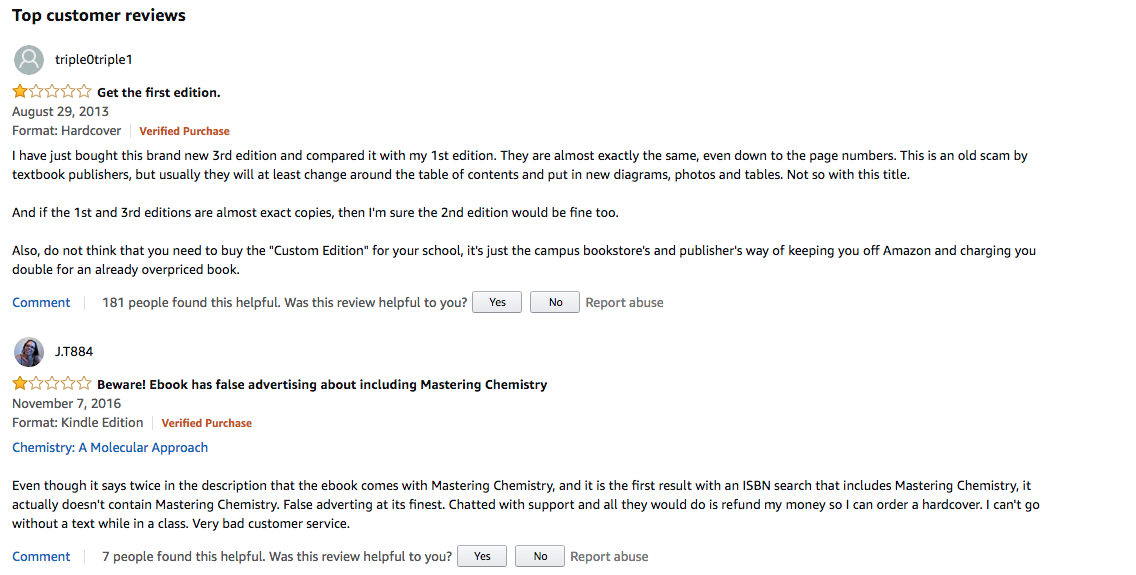

__Figure 1.__ Amazon reviews for books may address the content of the book, or just the purchasing experience of the buyer. My goal through natural language processing and machine learning is to tune a classification algorithm to predict, based on the content of a review whether the customer rates the book with a high rating (5-star) or a low rating (4 or fewer stars).

### 2. Client Profile and Motivation

My preliminary clients are retailers. From bookstores to toy stores and to large online retailers of many categories, retailers depend on consumer reviews to 1) make decisions on what products to purchase for resale and 2) to promote sales from their platform. The machine learning algorithm can be used by retailers internally or as part of their review platform used by consumers. I envision a review platform that facilitates consumer review writing. This platform could incorporate a text editor (like Grammarly) to help reviewers craft clear and effective reviews in addition to suggesting a rating level based on the specific rating system of a given platform. Together these features will help reviewers communicate more clearly and select corresponding ratings more consistently. The algorithm parameters would be tuned and adjusted based on the product categories and also based on prior customer input.

Ultimately, my machine-learning algorithm that predicts high and low ratings from review text features can be utilized for any product-category or business. Further, interpreting the sentiment of consumer input has value beyond rating systems. Businesses benefit from understanding customer responses to products, interactions with customer service, assessments of online resources, and many other customer-business interactions. A system that identifies positive and negative feedback from potential or actual customers can give businesses the power to intercede and to improve customer engagement and satisfaction.

During my Capstone project I acquired a large dataset of reviews and ratings, subsetted a specific genre of book reviews, explored quantitative and qualitative patterns within reviews and ratings, preprocessed and cleaned review text, grouped reviews into binary ratings categories, and fit machine learning algorithms to subsetted training data in order to test algorithms and parameters on testing data. These initial steps are the foundation for further development of tools to facilite effective review writing and consistent ratings assignments by consumers.

### 3. Data Aquisition

__3.1. Consumer reviews and ratings.__ My source dataset has over 22 million book reviews from Amazon.com from May 1996 - July 2014. These reviews are made available by Julian McAuley UCSD professor of Computer Science (McAuley et al. 2015; He & McAuley 2016). For this project, I have accessed a subset of all book reviews within a specific genre to train and test the algorithm.

* J. McAuley’s main page: http://cseweb.ucsd.edu/~jmcauley/
* Amazon Review Data links: http://jmcauley.ucsd.edu/data/amazon/ Data files with all reviews are only available from Julian McAuley by request.
* Count of reviews_Books records: 22,507,155
* Count of 5.0 rated reviews: 13,886,788
* For books with 10-digit International Standard Book Number (ISBN), the ASIN and the ISBN are the same.

__3.2. Genre-specific ISBN codes.__ I queried the Google Books API using a variety of science topic query terms to build a list of ISBN codes to match the ASIN codes in the Amazon review database. Google Books Developers resources: https://developers.google.com/books/docs/v1/getting_started

### 4. Data Wrangling
Accessing and subsetting the large file of Amazon Review data required several data wrangling steps before the data were ready for exploratory data analysis in Python.

1. Use Google Books API to query for science textbooks and non-fiction science books and their 10-digit ISBN codes. Standard ISBN-10 codes are the same as 'ASIN' ('Amazon Standard Identification Number') codes in the Book Review dataset. Query terms: 'q=science+[x]+nonfiction' where x on separate API requests was: science, biology, chemistry, physics, astronomy, invertebrate, biochemistry, zoology, math, geology, climate, and cellular. Ultimately my deduplicated, indexed DataFrame contained 'Title', 'Subtitle', 'description', and 'ISBN_10' columns for 3950 Science Texbook and non-fiction books. I pickled this DataFrame for subsequent processing in Pymongo.

2. Install MongoDB and Studio 3T to access the json as a database file. Then, in Jupyter Notebook with PyMongo use the .find() function to match the review documents I want to use with list of ISBN codes for science textbooks and non-fiction. 

3. Matching the list of science book ISBN codes with the large Amazon review database resulted in 729 individual titles in the genre "Non-fiction Science and Textbooks". Many books have multiple reviews by different Amazon customers resulting in a final dataset of 11546 reviews.  Some titles were reviewed by over 100 different users. The highest review count per book is 382 with an average of 16 reviews per book.


### 5. Exploratory Data Analysis and Inferential Statistics

__5.1. Exploring patterns and content of reviews and ratings.__ For the purposes of estimating ratings from reviews the most important data fields from the review data set are the ratings assigned by reviewers ('overall') and the text of the associated reviews ('reviewText'). Amazon ratings range from 1 to 5, where 5 is the highest rating. Like the full Amazon book review dataset, the non-fiction science book reviews are dominated by 5-star reviews (66%). 

To explore quantitative features of the review text I estimated the number of words per review. Below are the mean number of words per ratings groups where 'count' is the number of reviews per group (Table 1). The highest review group (overall = 5) has the shortest reviews by word count on average, but the highest word count is also in rating level 5 (max number of words = 5364).

|overall |count     |mean	    |std	    |min	|25%	|50%	|75%	|max   |
| ------ |:---------|:----------|:--------- |:------|:------|:------|:------|:---- |
|1.0	 |605.0	    |193.79  	|311.48 	|2.0	|50.0	|107.0	|226.0	|4027.0|
|2.0	 |405.0	    |183.94 	|253.04 	|5.0	|47.0	|105.0	|221.0	|2703.0|
|3.0	 |843.0	    |161.24 	|209.89 	|4.0	|38.5	|90.0	|188.5	|2326.0|
|4.0	 |2031.0	|146.83 	|185.37 	|1.0	|33.5	|78.0	|190.0	|2041.0|
|5.0	 |7662.0    |112.21 	|169.75 	|1.0	|30.0	|58.0	|126.0	|5364.0|
__Table 1.__ Reviews grouped and tallied by rating category 'overall' and summary statistics for number of words per review (mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile, and maxiumum number of words per review).

The majority of books rated and reviewed in this genre are given the highest rating of five. Additionally, for books in the data set with more than ten reviews the distribution of ratings is also biased towards higher ratings. Books with low average ratings (3-stars) are reviewed by fewer individuals that books with average ratings of 4.5 stars and higher (Figure 1). This pattern is predictable - popular books are generally reviewed by more users and garner higher ratings.

![averagerate](AvgRateBookHist.png)
__Figure 2.__ For books reviewed by more than 10 reviewers the mean ratings are most frequently greater than 4.5. Books with lower ratings are less likely to prompt additional purchases and reviews.

The corpus of book review text contains few surprises in the top 25 most common words (Figure 2). Words about books are reading are among the most common terms (e.g., book, books, read, reading, author). Positive words are also frequent coming from a dataset of 66% five-star reviews (e.g., like, great, well, good) . Some of the top 25 words are also genre-specific terms related to science, information and the real world. This word frequency graph also reveals that normalization of tokens is not complete at this stage. In later steps of pre-processing the data I will utilize a text stemmer to reduce redundant words like 'book' and 'books' from appearing separately. Although I removed stopwords before creating this word frequency chart, later I will add additional stop words to the list to remove words that do not add meaning or are very frequent across all reviews (e.g., book, books, read, reading). Word frequencies were calculated with NLTK's tokenize_words with English stopwords removed (Loper & Bird 2002).

![frequencygraph](frequencies.png)
__Figure 3.__ The top 25 most frequent words in the book review corpus (stop words removed) include words about books and reading, positive words, and scientific terms. The most frequent word used in 11546 Science Textbook reviews was 'book' which was more than three times more frequent than the next word, 'read' in these reviews. 

__5.2. Grouping reviews into low and high ratings.__ Based on my exploration of the distribution of ratings among the Science Textbook reviews I grouped reviews into two ratings categories for all subsequent analysis and modeling. All reviews with ratings of 1 to 4 stars are grouped together as 'low' ratings (n = 3884). Reviews associated with the highest Amazon rating are in the 'high' rating group (n = 7662). To compare and contrast the characteristics of the two ratings categories I performed several hypothesis tests.

Review length as measured by word count were lowest for the 5-star rated books and highests for the 1-star book rating. Does this pattern continue for the new binary ratings groups? I tested the null hypothesis that word counts are equal between the two 'high' and 'low' rating categories. To make comparisons between the ratings groups I first log-transformed the word count data to address non-normal distributions and performed an independent two-sample t-test for unequal variances. Results of this test on the log-transformed word counts indicate that the word count of all 1-star through 4-star rated reviews is significantly higher than 'five-star' rated reviews (t = 15.5, p = 0.00).

![wordcountboxplot](boxplot.png)
__Figure 4.__ Word counts for reviews with 1 to 4-stars ('not5') are higher than word counts for 5-star ('five') reviews (t=15.5, p=0.0). Count values are log transformed.

Another quantifiable differences between low and high ratings include percentage of review text entered in uppercase. Text written in all capital characters in reviews may reflect strong negative or positive sentiment by the reviewer. I explored the use of uppercase words in reviews using regular expressions to find and then count all words written in all uppercase.  For comparison between ratings categories I calculated the percentage of words in uppercase from the total number of words per review. There are many small values of percent UPPERCASE words for both ratings groups - my methods captured words like 'I' and 'A' and individual words written in uppercase for emphasis. When I considered reviews with 25% or more uppercase words there were 32 5-star reviews and only seven reviews of 4-stars or fewer. The statistical comparison betwen these two groups indicates there is no difference between the five-star and 1 to 4-star percentages of uppercase words. This analysis was indicative of other sub-groups I considered.

![uppercase](uppercase.png)

__Figure 5.__ The percent of words written by reviewers in uppercase is low for most reviews in our genre data. Low percentages are expected for normal text entry because I did not eliminate words like 'I' and 'A' for this calculation. For a small subset of reviews percent of uppercase words was higher, possibly for emphasis of either strong positive or negative sentiment. The average percentage of uppercase words did not differ significantly for five-star vs. lower rated review categories in this analysis.

### 6. Machine Learning
The motivation for machine learning (ML) on the dataset of consumer book ratings and book review text is to classify new review text as either a high rated book (5-star) or low rated book (4 or fewer stars). Following exploratory data analysis and inferential statistical comparisons of ratings and reviews, the first step towards machine learning is to pre-process the text data through normalization methods. Following pre-processing I divided the review data into training and testing data sets. In order for the computer to process and compare elements of high and low rated reviews the text data must be vectorized. Vectorization tools transform the corpus of review text into a vector of words. For each review the count or frequency of each vocabulary element is encoded. Many cells in this matrix will be zero - these are sparse vectors. Prior to fitting and comparing different ML algorithms I applied and compared two vectorization methods: CountVectorizer and TfidfVectorizer from the scikit-learn library (Pedregosa et al. 2011). I selected the best performing vectoriation method and proceeded to fit, tune and compare algorithms for predicting book ratings on unseen reviews (the test dataset).

#### 6.1. Text Preprocessing
My exploratory data analysis of word frequencies revealed several elements of review text that needed attention before the data were ready for machine learning. Even after removing stop words the most common word across all Science textbook reviews was 'book' which was used about 16,000 times more than the next most common word 'read'. Neither word has a negative or positive meaning in the context of book reviews, so they could be added to the stop words list. My first preprocessing step was to join 'english' stopwords from the NLTK library with my own short stop word list ('book', 'books', 'read', 'reading') into a set called 'stopwords'.

To pre-process the raw review input I defined preprocessing functions. The first function cleaned up noise by selecting alphabetical text by matching regular expressions, making all remaining words only lowercase characters, and keeping only stop words from my user-defined set, stopwords. I applied this function to the dataframe column of raw review text ('reviewText') and the new preprocessed column ('clean_revs') is still readable, but much cleaner.

|index	|reviewText	                                        |rating_cat	|clean_revs|
|:------|:------------------------------------------------- |:--------- |:---------|
|11541	|Definitely a MUST-READ if you are a home cooki...	|1	|definitely must home cooking enthusiast want g...|
|11542	|Pros: Scientifically informative and solid. Kn...	|0	|pros scientifically informative solid knowing ...|
|11543	|Real fun to read. For everybody that is inters...	|0	|real fun everybody intersted cooking certain p...|
|11544	|This book will teach you the chemical secrets ...	|0	|teach chemical secrets techniques usually used...|
|11545	|I paid more than $30 to buy such a superficial...	|0	|paid buy superficial trivial made big mistake ...|

__Table 2.__ Pandas DataFrame of raw review text, rating cateogry, and review text processed by the first preprocessing function to remove stop words, lowercase all letters, and remove numerals.

Final steps towards normalization involved text tokenization and stemming. My second preprocessing function first tokenized the 'clean_revs' columns using word_tokenize from NLTK so that the review text becomes a list of strings where each word or token is a string. From NLTK I also imported the SnowballStemmer with 'english' vocabulary. The second preprocessor applied the stemmer to the tokenized words to reduce the dimensions of each review document. The stemmer keeps the 'stem' of words with multiple forms: science, scientific, and scientifically all become 'scienc'. The product is a less readable, but ready for machine learning DataFrame column, 'clean_revs'.
```
0    ['good', 'scienc', 'nerd', 'non', 'scienc', 'a...
1    ['biolog', 'genet', 'enthusiast', 'great', 'of...
2    ['bought', 'daughter', 'borrow', 'frank', 'mcc...
3    ['recommend', 'tour', 'guid', 'ireland', 'extr...
4    ['school', 'recent', 'upgrad', 'chemistri', 'h...
5    ['confus', 'explain', 'poor', 'overal', 'graph...
6    ['lot', 'cool', 'experi', 'complet', 'fun', 'p...
7    ['great', 'condit', 'better', 'expect', 'ship'...
Name: clean_revs, dtype: object
```
__Figure 6.__ Once preprocessing is complete the raw review text is reduced to tokenized, stemmed, lowercase, alphabetical lists of words with no stop words.

In the final steps before vectorization I stored the tokenized text in a feature matrix (m x n) called 'X' and the response vector (where 0 is ratings 1 through 4 and 1 is rating level 5) in the m x 1 vector 'y'. I then divided X and y into training and test datasets (X_train, X_test, y_train, y_test) using scikit-learn's train_test_split function. Because the number of reviews in the '0' rating category is much lower than the '1' rating category I stratified the the division into training and testing data to ensure that both categories are fairly represented in all subsets.

#### 6.2. Vectorizer Selection
Different vectorizers encode text data using different methods. Scikit-learn's CountVectorizer builds a vocabulary based on the tokens in the training data and counts the occurance of each token encoded in a sparse vector for each observation (review). A vectorizer that takes into account more information that simple token counts is the TfidfVectorizer which applies the Term Frequency - Inverse Document Frequency to calculate token frequencies using the test data tokens. Specifically, Term Frequency is the frequency of a given token within a document while Inverse Term Frequency is used to reduce the effect of tokens that are very common across all documents. The TfidfVectorizer learns both the vocabulary as well as the inverse document frequency weights. 

To compare the effect of these two vectorizers on the book review document vocabularies I instantiated both CountVectorizer and TfidfVectorizer separately and saved the resulting document-term matrices from the fit and transform steps of vectorization on the X_train and X_test matrices.  Next, I instantiated a Naive Bayes classifier, MultinomialNB(), and trained it on the X_train document-term matrix and y_train (the corresponding binary rating vector) from both vectorizers. I made class predictions with the Multinomial Naive Bayes classifier using the X_test document-term matrices, calculated scores to compare models, and used GridSearchCV to select the best parameters for the simple Naive Bayes model. For CountVectorizer the apparent best parameters were the default parameters while for TfidfVectorizer the best alpha value was 0.1. Updating alpha for TfidfVectorizer and re-running the classifier resulted in a higher ROC-AUC score as well and improved prediction counts in the confusion matrix.

|Vectorizer/Classifier: |ROC-AUC |GridSearchCV best params|
|:--------------------- |:------ |:-----------------------|
|CountVectorizer/MultinomialNB | 0.74 | alpha=1, fit_prior=True|
|TfidfVectorizer/MultinomialNB | 0.75 | alpha=0.1, fit_prior=True|
__Table 3.__ Comparison of predictive effect of Multinomial Naive Bayes model fit with the document-term matrices from two separate vectorizers applied to the vocabulary of book review data. ROC_AUC prediction scoring values, which calculates the area under the Receiver Operating Characteristic curve, are very similar after tuning using the best parameters from GridSearchCV.

The area under the ROC curve is slightly greater using tuned TfidfVectorizer, but the CountVectorizer accurately identifies more ratings correctly in the Confusion Matrix. Predictions made with the TfidfVectorizer and MultinomialNB improved a lot with GridSearchCV tunings of alpha. For my initial work with additional algorithms I used the CountVectorizer fit and transformed with the pre-processed document-term matrices.

#### 6.3. Model Comparison


|Classifier: |ROC-AUC |GridSearchCV best params|
|:--------------------- |:------ |:-----------------------|
|MultinomialNB | 0.74 | alpha=1, fit_prior=True|
|RandomForestClassifier | 0.73 | max_features=300, min_samples_leaf=5|
|LogisticRegressionCV | 0.77 | Cs=10, max_iter=100, tol=0.0001|
|SGDClassifier | 0.67 | max_iter=5, tol=None, alpha=0.01|
__Table 4.__ Comparison of four classifier algorithms fit with the document terms matrix from CountVectorizer parameters alpha=1, fit_prior=True which were the best parameters from GridSearchCV. SGDClassifier recommended in lieu of Support Vector Machines for fitting large-scale linear classifiers without having to copy dense numpy C-contiguous double precision arrays as input.

### 7. Results Summary


### 8. Recommendations for review platforms and future directions

### 9. Sources:

He, Ruining and Julian McAuley. 2016. Ups and Downs: Modeling the Visual Evolution of Fashion Trends with One-Class Collaborative Filtering. In Proceedings of the 25th International Conference on World Wide Web (WWW '16). International World Wide Web Conferences Steering Committee, Republic and Canton of Geneva, Switzerland, 507-517. DOI: https://doi.org/10.1145/2872427.2883037

Loper, Edward and Steven Bird. 2002. NLTK: the Natural Language Toolkit. In Proceedings of the ACL-02 Workshop on Effective tools and methodologies for teaching natural language processing and computational linguistics - Volume 1 (ETMTNLP '02), Vol. 1. Association for Computational Linguistics, Stroudsburg, PA, USA, 63-70. DOI: https://doi.org/10.3115/1118108.1118117

McAuley, Julian, Christopher Targett, Qinfeng Shi, and Anton van den Hengel. 2015. Image-Based Recommendations on Styles and Substitutes. In Proceedings of the 38th International ACM SIGIR Conference on Research and Development in Information Retrieval (SIGIR '15). ACM, New York, NY, USA, 43-52. DOI: http://dx.doi.org/10.1145/2766462.2767755

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., and Duchesnay, E. 2011. Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 12, pp. 2825-2830.